# 네이버 블로그 크롤링 (네이버 API 이용)


## 들어가며...



## 1) 크롤링? 파싱?

### 1-1) 크롤링

- '웹 크롤러'라는 단어에서 유래되었음.
- 크롤러란 조직적, 자동화된 방법으로 WWW를 탐색하는 컴퓨터 프로그램.
- 크롤링은 크롤러가 하는 작업을 부르는 말.
- 여러 인터넷 사이트의 페이지(문서,html 등)를 수집해서 분류하는 것.
- 대체로 찾아낸 데이터를 저장한 후 쉽게 찾을 수 있게 인덱싱 수행.

### 1-2) 파싱

- 파싱이란 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공하는 것.
- 파싱이란 일련의 문자열을 의미있는 '토큰'으로 분해하고 이들로 이루어진 '파스 트리'를 만드는 과정.
- 입력 토큰에 내제된 자료 구조를 빌드하고 문법을 검사하는 역할을 함.

## 2) 애플리케이션 등록 ( API 이용신청)

![애플리케이션 등록_1](https://user-images.githubusercontent.com/51112316/61574953-2f655d80-ab01-11e9-8b8f-cc74183302da.jpg)
![애플리케이션 등록_2](https://user-images.githubusercontent.com/51112316/61574954-31c7b780-ab01-11e9-9274-e1d237547d94.jpg)

### 2-1) 네이버API  예제 사용

- 네이버개발자 -> Products -> 서비스API -> 검색 -> 개발 가이드 보기 -> 0.API호출예제 -> Python

#### [API호출예제](https://developers.naver.com/docs/search/blog/)

~~~python
import java.io.BufferedReader;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.URL;
import java.net.URLEncoder;

public class APIExamSearchBlog {

    public static void main(String[] args) {
        String clientId = "YOUR_CLIENT_ID";//애플리케이션 클라이언트 아이디값";
        String clientSecret = "YOUR_CLIENT_SECRET";//애플리케이션 클라이언트 시크릿값";
        try {
            String text = URLEncoder.encode("그린팩토리", "UTF-8");
            String apiURL = "https://openapi.naver.com/v1/search/blog?query="+ text; // json 결과
            //String apiURL = "https://openapi.naver.com/v1/search/blog.xml?query="+ text; // xml 결과
            URL url = new URL(apiURL);
            HttpURLConnection con = (HttpURLConnection)url.openConnection();
            con.setRequestMethod("GET");
            con.setRequestProperty("X-Naver-Client-Id", clientId);
            con.setRequestProperty("X-Naver-Client-Secret", clientSecret);
            int responseCode = con.getResponseCode();
            BufferedReader br;
            if(responseCode==200) { // 정상 호출
                br = new BufferedReader(new InputStreamReader(con.getInputStream()));
            } else {  // 에러 발생
                br = new BufferedReader(new InputStreamReader(con.getErrorStream()));
            }
            String inputLine;
            StringBuffer response = new StringBuffer();
            while ((inputLine = br.readLine()) != null) {
                response.append(inputLine);
            }
            br.close();
            System.out.println(response.toString());
        } catch (Exception e) {
            System.out.println(e);
        }
    }
}
~~~

#### 문제 발생 :  

#### 네이버 블로그 형식 맞춰 긁어왔음.
                  
#### 사실은 요약된 내용.

#### 모든 내용을 다 보고싶으면 개발이 필요.

# 네이버 블로그 크롤링

In [1]:
import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

naver_Client_id = "E4zDnlSmVAnJ7dvIOUUx"
naver_Client_secret = "lLxEw7DWbB"

In [2]:
def get_blog_count(query,display) :
    encode_query=urllib.parse.quote(query)
    search_url="https://openapi.naver.com/v1/search/blog?query="+ encode_query
    # 위의 https://~ 는 따온 API호출예제에 있음.
    request=urllib.request.Request(search_url)
    # 이렇게 하면 내가 만들었던 url 형태로 요청한다.
    # 그러나 이렇게 하면 API로부터 거부당한다.
    # 왜냐하면 ID, Secret을 주지 않았기 때문에 아래와 같이 이것을 입력해준다.
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    # code를 받아와서 웹에서 정상적으로 접속했을 때 200번을 준다.
    if response_code is 200 :
        response_body = response.read()  # 실제로 읽어 들인다.
        response_body_dict = json.loads(response_body.decode('utf-8'))
        # 네이버에서 넘겨줄 때 json으로 넘겨주는데 이것을 전부 '딕셔너리'로 저장한다.
        
        print('Last build date :' + str(response_body_dict['lastBuildDate']))
        # json으로 넘겨받을 것들 중에서 최종날짜를 출력
        print('Total :' + str(response_body_dict['total']))  # 관측개수
        print('Start :' + str(response_body_dict['start']))
        print('Display :' + str(response_body_dict['display']))
        #이렇게 넘어온 것을 다 출력해본다.
        
        # 검색된 결과가 0 일 경우        
        if response_body_dict['total']== 0:
            blog_count = 0
        else :
            blog_total=math.ceil(response_body_dict['total']/int(display))
            # 위에서 한 번에 10개씩 출력한다고 했으니 나눠주어서 개수를 맞춰준다.
        
            if blog_total >= 1000 :
                blog_count = 1000
                # 최대 1000개로 제한이 있으니 1000개를 넘었을 때는 1000개로 지정한다.
            else : 
                blog_count = blog_total
        
            print('Blog total :' + str(blog_total))
            print('Blog count : ' + str(blog_count))
        
        return blog_count

- 블로그의 모든 내용을 가져오는 함수[(API사용예제)는 샘플 내용만 가져온다.]



In [3]:
def get_blog_post(query,display,start_index,sort):
    global no, fs
    #get_blog_count(query,display)를 정의할 때 사용했던 것과 동일하게 사용(아래 7문장)
    encode_query = urllib.parse.quote(query)
    # 동일하게 사용하나 search_url에는 옵션을 조금 더 추가해 준다.
    search_url = "https://openapi.naver.com/v1/search/blog?query=" + encode_query +"&display=" + str(display) + "&start=" + str(start_index) + "sort=" + sort
    request=urllib.request.Request(search_url)
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    #print(response_code) 이분은 윗부분까지 해서 접속이 잘되었는지를 확인하는 것.
        
    if response_code is 200:
        response_body=response.read()
        response_body_dict=json.loads(response_body.decode('utf-8'))
        # json이 해당하는 블로그가 여러개 나오면 전부 다 하나의 큰 덩어리로 주는데
        # 나눠서 하나씩 접근 하기 위해 아래의 코드를 짜줌.
        for item_index in range(0,len(response_body_dict['items'])):
            # 혹시 태그부분이 따라올 수 있기 때문에
            # 그것을 지우고 사용하기 위해  re(regular expression)으로 제거를 해준다.
            # 즉 태그를 없애주는 정규표현식을 이용한다.
            try :
                remove_html_tag = re.compile('<.*?>')
                title = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['title'])
                #또한 주소가 따라오는데 이건 필요 없는 것이다.그러므로 없애준다.
                link = response_body_dict['items'][item_index]['link'].replace("amp;","")
                # description에도 마찬가지로 태그가 따라올 수 있기 때문에 제거해준다.
                description = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['description'])
                blogger_name = response_body_dict['items'][item_index]['bloggername']
                #  포스트(개시글)의 주소가 아니라 블로그 자체의 링크를 가져옴.
                blogger_link = response_body_dict['items'][item_index]['bloggerlink']
                post_date = response_body_dict['items'][item_index]['postdate']
                #아래처럼 변환해서 가져와도 되고 그냥 주는대로 가져와도 된다.
                #post_date = datetime.datetime.strptime(response_body_dict[['item'][item_index]['postdate'],"%Y%m%d").strtime("%Y.%m.%d")
                
               # 이제 json에서 오는 결과를 하나씩 items에 다 들어가 있다. 그것을 이제 다 끄집어서 가져온다.
                no +=1
                print("-------------------------------------------------") #각각의 게시글을 구분시킴
                print("#"+ str(no))  #몇번째 게시글인지 출력
                print("Title :"+ title)
                print("Link :"+ link)
                print("Description :"+ description)
                print("Blogger Name :"+ blogger_name)
                print("Blogger Link :"+ blogger_link)
                print("Post Date :"+ post_date)
                
                                                                              
                post_code = requests.get(link)
                #  저 정보들은 사실 네이버 오픈 API에서 제공해주는 정보다.
                # 그런데 우리가 필요한 것은 실제 블로그에 포스트 된 내용이 필요하기 때문에
                # 뷰티풀숲을 이용해 가져온다. 
                post_text = post_code.text
                post_soup = BeautifulSoup(post_text,'lxml')
                
                # 네이버 블로그의 문제점 : 마우스를 긁어오지 못하게 iframe으로 만들어 놓은게 있다.
                #그래서 iframe#mainFrame 이라는 html 부분을 들어가서
                # 그 부분의 실제 post url을 뽑을 수 있다.
                # 그냥 가져와선 안되고 그 url에서 소스부분(src)만 가져온다.
                # 그래서 그걸로 접속해서 실제적인 블로그 포스트에 대한 내용을 긁어오기 때문에
                # 여기에 다시 한번 "blog_post_url"이라는 주소로 접근을 한다.
                # 그리고 그것들에 대한 정보를 가져온다.
                for mainFrame in post_soup.select('iframe#mainFrame'):
                    blog_post_url = "http://blog.naver.com"+mainFrame.get('src')
                    blog_post_code = requests.get(blog_post_url)
                    blog_post_text = blog_post_code.text
                    blog_post_soup = BeautifulSoup(blog_post_text,'lxml')
                    
                    # 블로그 전체의 여러가지 메뉴들도 있고 그런 것 제외하고 postViewArea라는 부분에
                    # 실제 포스트 내용이 들어있다. 그래서 여기로 선택한다. 이게 진짜 블로그 포스트의 컨텐트다. 
                    for blog_post_content in blog_post_soup.select("div#postViewArea"):
                        blog_post_content_text = blog_post_content.get_text()
                        blog_post_full_contents = str(blog_post_content_text) #컨텐트를 string으로 캐스팅해서 가져온다.
                        blog_post_full_contents = blog_post_full_contents.replace("\n\n",'\n') 
                        #요약된 description 만 주는게 아니라 이젠 진짜로 된 포스트를 준다.
                        #print("blog_post_contents : " + blog_post_full_contents+"\n")
                        #전체 내용을 print 하면 너무 많기 때문에 위의 코드로 하지않고 파일로 저장한다.
                        #이를 통해 이후에 데이터 분석 등에 사용한다.
                        fs.write(blog_post_full_contents+'\n')
                        fs.write("-----------------------------------")
            #만약에 못할 경우 그냥 넘어가는 코드.
            except: 
                item_index+=1
                print("■■■■■■저장할 수 없음.■■■■■■")

In [4]:
if __name__=='__main__' :
    no = 0           # 몇 개의 포스트를 저장했는지 세기 위한 index
    query = "박대" # 검색을 원하는 문자열로써 UTF-8로 인코딩한다.
    display = 10     # 검색 결과 출력 건수 지정, 10(기본값), 100(최대값)
    start = 1        # 검색 시작 위치로 최대 1000까지 가능
    sort = 'date'    # 정렬 옵션 : sim(유사도순, 기본값), date(날짜순)
    
    #블로그 콘텐츠의 한글 저장을 위해 encoding='utf-8'으로 설정.
    fs = open(query + ".txt",'a',encoding='utf-8')
    
    blog_count = get_blog_count(query,display)
    for start_index in range(start,blog_count + 1, display):
        get_blog_post(query,display,start_index,sort)  
    
       
    fs.close()

NameError: name 'get_blog_count' is not defined

## 형태소 분석

- mecab : window에서 안되는 걸로 알고 있음.
- 한나눔 : 성능이 떨어지는 것으로 알고 있음
- 카이(카카오 형태소 분석기) : 사전 추가가 안됨.
- 트위터 분석기, 코모란 두 가지를 중점.

In [1]:
from konlpy.tag import *
import time

In [2]:
okt = Okt()
han = Hannanum()
komoran = Komoran()
ko = Kkma()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [5]:
# 데이터 입수
text = open(query+'.txt',encoding='utf-8').read() 

In [6]:
okt_result1 = okt.nouns(text)
'''
# 트위터 morphs
okt_result = okt.morphs(text)
# 트위터 nouns 
okt_result1 = okt.nouns(text)
# 트위터
okt_result2 = okt.phrases(text)
# 트위터 pos 
okt_result3 = okt.pos(text)
'''

'\n# 트위터 morphs\nokt_result = okt.morphs(text)\n# 트위터 nouns \nokt_result1 = okt.nouns(text)\n# 트위터\nokt_result2 = okt.phrases(text)\n# 트위터 pos \nokt_result3 = okt.pos(text)\n'

In [8]:
# 트위터 분석기 (명사만 출력)
print(okt_result1)

['애호박', '볶음', '명란', '고급', '진', '맛', '요즘', '애호박', '한참', '가격', '맛', '반찬', '하나', '명란', '알', '정말', '고급', '진', '감칠맛', '명란', '평소', '애정', '분', '레시피', '명란', '애호박', '볶음', '해도', '제철', '애호박', '요', '고급', '한정식', '집', '만날', '법', '반찬', '이웃', '동생', '보더', '눈', '말', '새우젓', '평소', '갑자기', '냉동', '실', '명란', '실험', '한번', '진짜', '조합', '아주', '만이', '만요', '저', '명란', '젓', '그냥', '생으로', '건', '그닥', '편', '알탕', '계란찜', '오늘', '주', '요리', '쪽', '요리', '때', '마다', '거지', '정말', '감칠맛', '최고', '명란', '남편', '명란', '탕', '찜', '볶음', '요', '애호박', '볶음', '새우젓', '때', '명란', '때', '마찬가지', '요', '미리', '소금', '솔솔', '밑', '다음', '방법', '그냥', '마무리', '간', '방법', '가지', '혹시', '애호박', '간이', '슴슴', '애호박', '특유', '달', '맛', '것', '마무리', '간', '간이', '양념', '처음', '애호박', '소금', '약간', '솔솔', '잠시', '다음', '간', '영', '소질', '그냥', '절', '마무리', '간', '영상', '레시피', '확인', '명란', '애호박', '볶음', '접시', '기준', '재료', '애호박', '개명', '란', '알', '양파', '홍', '고추', '개', '식용유', '들기름', '참기름', '소금', '액젓', '다시', '마물', '그냥', '물', '반', '컵', '재료', '준비', '양파', '홍', '고추', '애호박', '명란', '알', '준비', '애호박', '반', '준', '

## 불용어(stopword) 제거


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [8]:
stopwords=pd.read_csv("한글불용어.csv",encoding='cp949')
stopword=stopwords["불용어"].tolist()

In [9]:
raw_data=pd.DataFrame(okt_result1)
nostop_data=raw_data
for word in stopword :
    nostop_data=nostop_data[nostop_data[0]!=word]

In [10]:
from collections import Counter
import pandas as pd
import numpy as np

In [11]:
nostop_data_list=nostop_data[0].tolist()
count=Counter(nostop_data)
tag2=count.most_common(100)

In [13]:
nostop_data_list=nostop_data[0].tolist()
count=Counter(nostop_data_list)
tag2=count.most_common(100)
pd.DataFrame(tag2)

,0,1
0,박대,2478
1,생선,905
2,맛,627
3,군산,487
4,구이,407
5,조림,364
6,마리,287
7,술,242
8,밥,212
9,건조,200


## 워드 클라우드

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopword, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

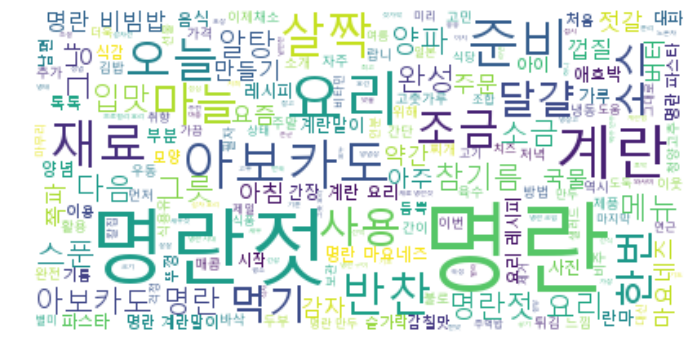

In [43]:
# 트위터 형태소 분석기로 추출한 명사로 워드클라우드를 그린다.
# Window의 경우 폰트 경로
# font_path = 'C:/Windows/Fonts/malgun.ttf';

wordcloud = WordCloud(
    font_path='/Library/Fonts/malgun.ttf',
    background_color='white'
).generate(' '.join(nostop_data_list))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()